### ROAD ACCIDENT SEVERITY MODEL USING LINEAR REGRESSION

#### The work flow

**1.importing the necessary libraries:-**
Pandas - read dataframe
Scikit-Learn - for model creation, training. 
Seaborn/Matplotlib - for data visualization.

**2.Data preparation:-**
Checking of missing values and replacing them
Checking for anormalies in the data set - will use scatter plot & box plot to check for outliers.
Summary statistics - Mean, mode, Median. 

**3.Get the dependet values and independent values**
accident Severity - Is the accident {Minor, Moderate, Severe, Fatal}. 

Independent variables - number of casualties, casualty severity,  accident_severity, light condition 

**4.Split the data to training and test data**

**5.Create the model and train it**

**6.Test the model - hypothetical variables**

->Educational level - what level of education is the driver involved in the road accident. 

->Vehicle relationship - are most drivers involved in road accidents owners or employess.

->Weather condition - Do most accidents occur on a normal or rainy weather.

->Road surface type - Do most accidents occur on asphalt, gravel, earth etc...

->Road surface condition - Do most accidents occur on dry or wet/Dump roads.



In [204]:
#importing the modules. 
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt 

#LOADING THE DATA SET
df = pd.read_csv('road_accident_severity_dataset.csv')

df


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,service_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casualty,Fitness_of_casualty,Pedestrian_movement,Cause_of_accident,Injury_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [205]:
print( df.shape, df.size)

(12316, 32) 394112


In [206]:
import matplotlib.pyplot as plt 
import plotly.express as px
#Histogram for Number of casualties and the road surface types 
px.histogram(df,df['Road_surface_type'], df['Number_of_casualties'],color='Road_surface_type', template='plotly_dark')


In [207]:
#Pie chart for Injury severity and Number of casualties
px.pie(df,df['Injury_severity'],df['Number_of_casualties'],color='Injury_severity',template='plotly_dark',hole=0.3)

In [208]:
#histogram for Vehicle driver relationship
px.histogram(df,df['Vehicle_driver_relation'], df['Number_of_casualties'],color='Vehicle_driver_relation', template='plotly_dark')

In [209]:
#Histogram for road surface conditions and the number of casualties 
px.histogram(df,df['Road_surface_conditions'], df['Number_of_casualties'],color='Road_surface_conditions', template='plotly_dark')

In [210]:
#DATA PREPARATION 
#1.Checking for missing values 
null_values_1 = df .isnull().sum()
print('The Columns and the number of Null values:\n', null_values_1)

The Columns and the number of Null values:
 Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
service_of_vehicle             3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity   

In [211]:
#From the above outputs ....I do away with columns that have null values of more than 1000, and the ones that I don't need
#drop Time, Service_of_vehicle, Defect_of_vehicle, Work_of_casualty, Fitness_of_casualty

df.drop(['Time','service_of_vehicle','Defect_of_vehicle','Work_of_casualty','Fitness_of_casualty'], axis=1, inplace=True)

#Replacing the remianing columns that contain missing values with na
df_new = df.fillna('na')
print('The New Data Set:')
df_new.head(20)

 


The New Data Set:


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Injury_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,na,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,na,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
5,Friday,31-50,Male,na,Unknown,na,na,na,na,na,...,1,1,U-Turn,Driver or rider,Male,31-50,3,Not a Pedestrian,Overloading,Slight Injury
6,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Residential areas,Undivided Two way,...,1,1,Moving Backward,Driver or rider,Female,18-30,3,Not a Pedestrian,Other,Slight Injury
7,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,other,...,2,1,U-Turn,na,na,na,na,Not a Pedestrian,No priority to vehicle,Slight Injury
8,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Industrial areas,other,...,2,1,Going straight,Pedestrian,Male,Under 18,3,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Residential areas,Undivided Two way,...,2,1,U-Turn,Passenger,Male,18-30,3,Not a Pedestrian,Moving Backward,Serious Injury


In [212]:
#Checking for any existing columns with Null values
null_values_2 = df_new.isnull().sum()
print('The Columns and the number of Null values:\n', null_values_2)

The Columns and the number of Null values:
 Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Injury_severity                0
dtype: int64


In [213]:
df_new.info()
df_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Area_accident_occured        12316 non-null  object
 9   Lanes_or_Medians             12316 non-null  object
 10  Road_allignment              12316 non-null  object
 11  Types_of_Junction            12316 non-null  object
 12  Road_surface_type            12316 non-null  object
 13  Road_surface_conditions      12

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [214]:
# LABEL ENCODING - This is to allow the model to work with string values.
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
for col in df_new.columns:
    if df_new[col].dtype == object:
        df_new[col] = l.fit_transform(df_new[col])
df_new


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Injury_severity
0,1,0,1,0,0,0,0,3,9,6,...,2,2,2,3,2,5,3,5,9,2
1,1,1,1,4,0,3,11,3,6,4,...,2,2,2,3,2,5,3,5,16,2
2,1,0,1,4,0,0,5,3,1,7,...,2,2,2,0,1,1,2,5,0,1
3,3,0,1,4,0,2,11,0,6,7,...,2,2,2,2,0,0,2,5,1,2
4,3,0,1,4,0,1,17,3,4,7,...,2,2,2,3,2,5,3,5,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,1,1,7,0,1,4,3,5,4,...,2,1,2,3,2,5,3,5,10,2
12312,3,4,1,1,0,2,0,3,5,2,...,2,1,4,3,2,5,3,5,10,2
12313,3,2,1,4,0,2,1,3,5,2,...,1,1,4,0,1,1,2,5,1,1
12314,3,0,0,4,0,3,5,3,6,4,...,2,1,4,3,2,5,3,5,5,2


In [215]:
# from sklearn.preprocessing import LabelEncoder

# l = LabelEncoder()
# for col in df_new.columns:
#     if df_new[col].dtype == object:
#         df_new[col] = l.fit_transform(df_new[col])

# encoding_map = {}
# for i in range(len(df_new[col])):
#     encoding_map[df_new[i]] = df_new[col][i]

# print(encoding_map)

In [216]:
#SPLITTING THE DATA TO x and y 
x=df_new.drop('Injury_severity',axis=1)
x

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,6,...,3,2,2,2,3,2,5,3,5,9
1,1,1,1,4,0,3,11,3,6,4,...,8,2,2,2,3,2,5,3,5,16
2,1,0,1,4,0,0,5,3,1,7,...,2,2,2,2,0,1,1,2,5,0
3,3,0,1,4,0,2,11,0,6,7,...,8,2,2,2,2,0,0,2,5,1
4,3,0,1,4,0,1,17,3,4,7,...,8,2,2,2,3,2,5,3,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,1,1,7,0,1,4,3,5,4,...,8,2,1,2,3,2,5,3,5,10
12312,3,4,1,1,0,2,0,3,5,2,...,8,2,1,4,3,2,5,3,5,10
12313,3,2,1,4,0,2,1,3,5,2,...,8,1,1,4,0,1,1,2,5,1
12314,3,0,0,4,0,3,5,3,6,4,...,8,2,1,4,3,2,5,3,5,5


In [217]:
y=df_new['Injury_severity']
y

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Injury_severity, Length: 12316, dtype: int32

In [218]:
#MODEL BUILDING 
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 100)

x_train

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
6013,3,1,1,1,0,6,15,3,12,4,...,8,2,1,2,1,1,3,2,5,10
10050,0,2,1,4,0,0,0,3,7,2,...,1,3,5,9,0,0,0,2,5,9
9346,5,2,1,4,0,3,17,3,9,4,...,8,1,1,2,2,1,0,2,6,10
8724,0,1,1,4,0,4,0,3,7,2,...,8,2,1,2,3,2,5,3,5,12
11295,2,1,1,4,0,3,17,1,6,2,...,8,2,1,4,3,2,5,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,3,3,1,2,2,1,0,3,2,4,...,8,2,1,2,3,2,5,3,5,1
12119,4,3,1,4,0,2,5,3,7,4,...,8,2,1,4,3,2,5,3,5,12
8039,6,1,1,4,0,2,0,3,1,7,...,8,2,1,2,3,2,5,3,5,0
6936,5,1,1,4,0,2,0,3,6,4,...,1,2,1,2,0,1,0,2,5,9


In [219]:
x_test

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
9498,5,0,1,4,0,1,5,3,5,2,...,8,1,1,2,1,0,4,2,5,9
3270,6,1,1,4,0,2,10,3,6,7,...,8,2,1,2,3,2,5,3,5,13
7914,1,1,1,6,0,1,7,3,6,2,...,8,2,1,9,0,1,1,1,5,0
9659,4,1,1,4,0,1,12,3,2,4,...,8,2,1,3,0,1,4,2,5,3
5206,5,0,1,1,0,1,9,3,4,4,...,8,2,3,2,2,1,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,3,1,1,1,0,2,3,3,7,0,...,6,2,1,1,0,1,4,2,5,16
4776,3,0,1,4,0,1,5,3,7,7,...,8,1,2,9,0,1,0,2,5,0
8241,1,1,1,1,0,1,0,3,4,2,...,8,2,3,2,3,2,5,3,5,11
11358,5,1,1,4,0,3,7,3,7,4,...,8,2,2,4,0,1,3,2,5,13


In [220]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\

LinearRegression()

In [221]:
# The naming convention allows the model to make the recall based on the data that it has been trained using.
y_lr_train_pred = lr.predict(x_train) 
y_lr_test_pred = lr.predict(x_test)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\

In [222]:
y_lr_train_pred


array([1.84964164, 1.73062221, 1.78410681, ..., 1.87074588, 1.80609595,
       1.86809527])

In [223]:
y_lr_test_pred

array([1.8678431 , 1.86213223, 1.84076533, ..., 1.78179684, 1.80439455,
       1.98721303])

In [224]:
#EVALUATION OF THE MODEL.
#mse = is used to check how close the estimates are to the actual values. 
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
# lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
# lr_test_r2 = r2_score(y_test, y_lr_test_pred)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [225]:
print('LR MSE (Train):', lr_train_mse)
# print('LR R2 (Train):', lr_train_r2)
print('LR MSE (Test):', lr_train_mse)
# print('LR MSE (Test):', lr_train_r2)

LR MSE (Train): 0.16595005491816703
LR MSE (Test): 0.16595005491816703


Text(0.5, 0, 'Experimental Logs')

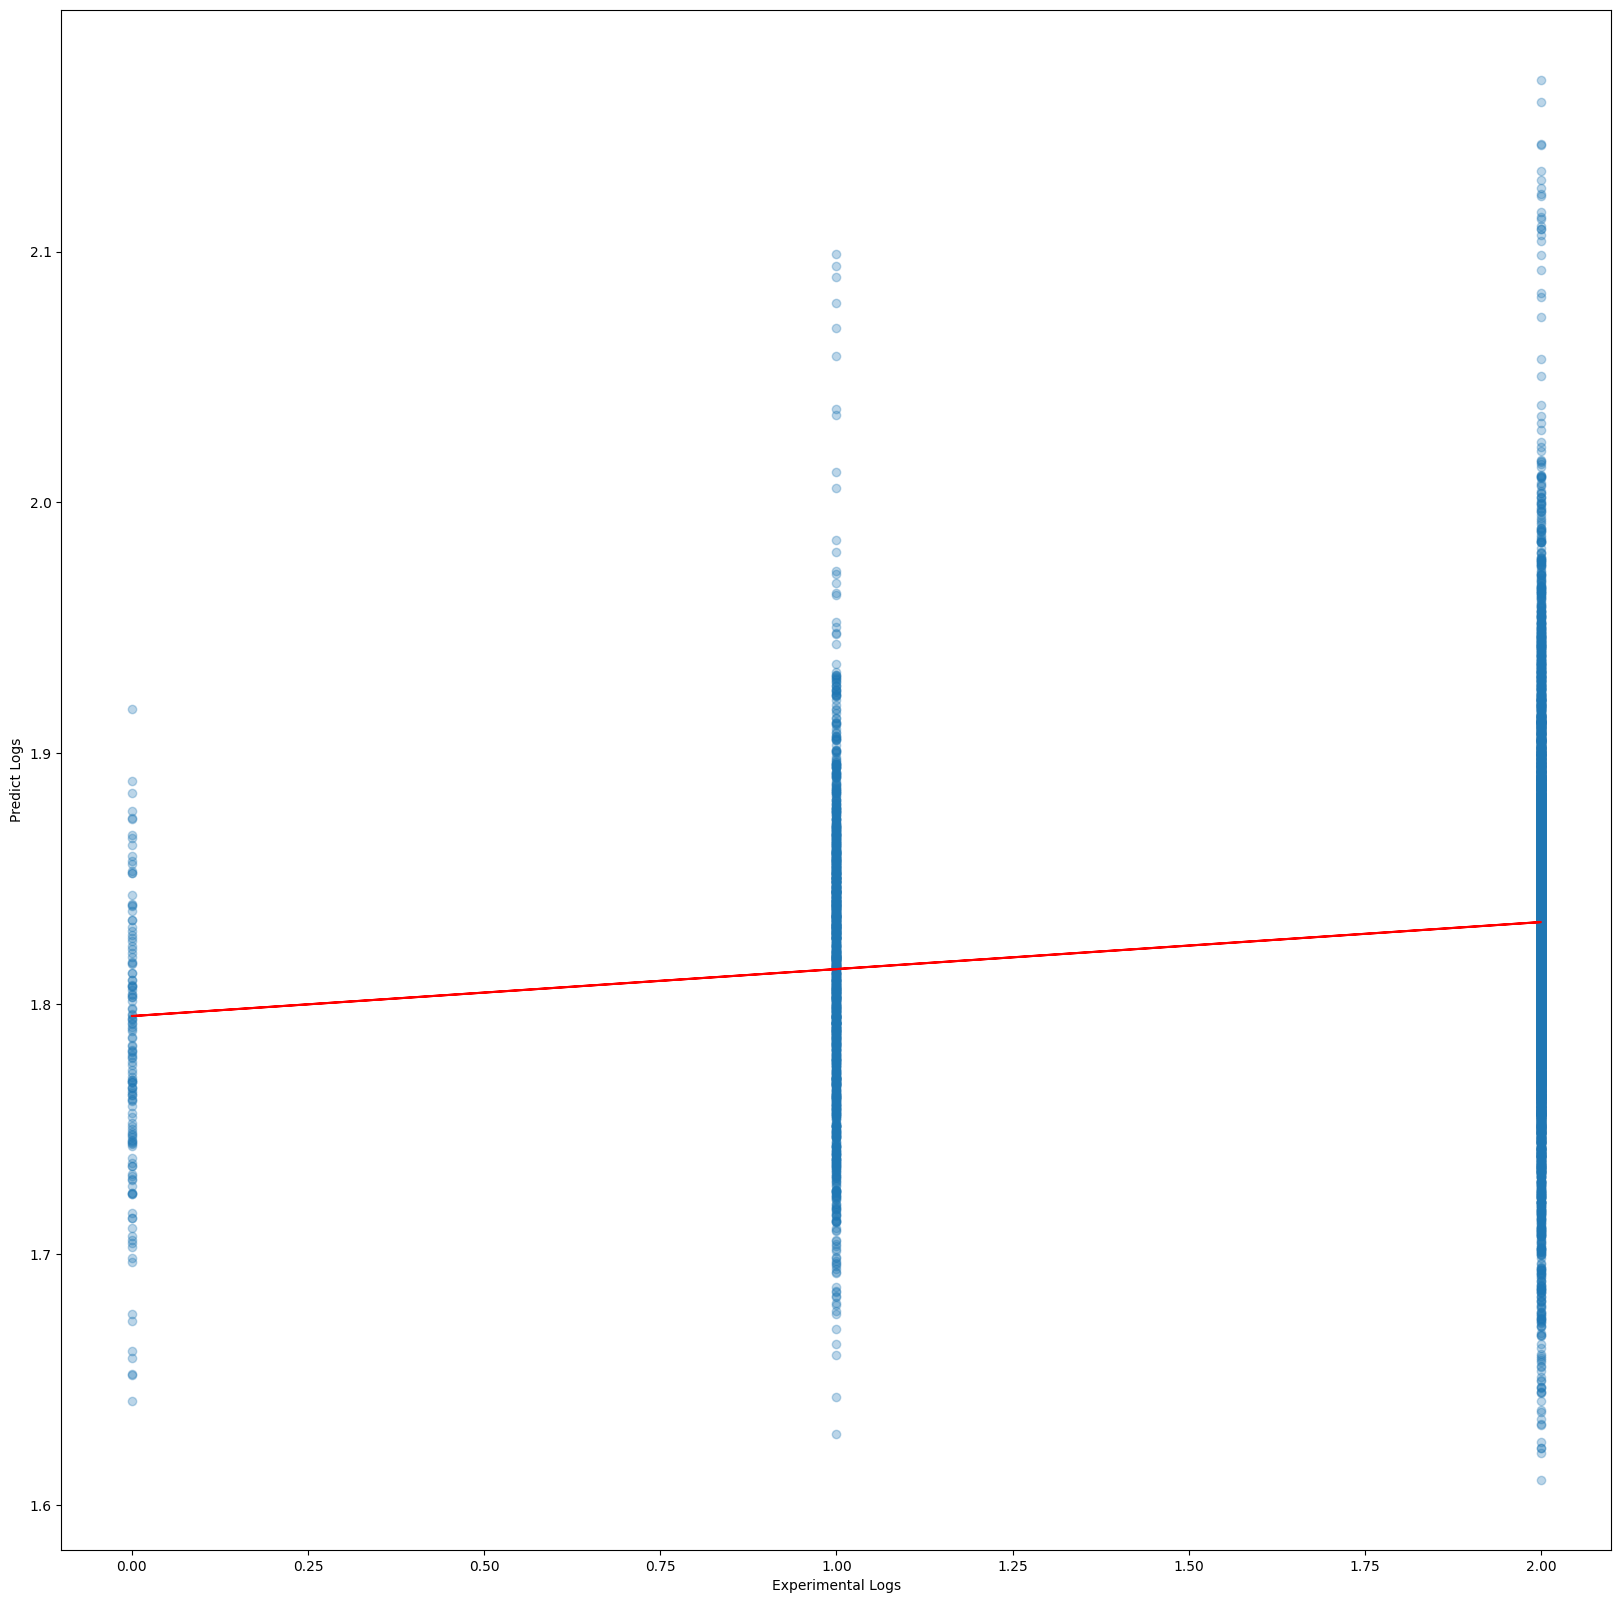

In [226]:
import matplotlib.pyplot as plt 
import numpy as np 

plt.figure(figsize=(20,20))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'Red')
plt.ylabel('Predict Logs')
plt.xlabel('Experimental Logs')